In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy import special

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem

---------------------------------- Hypergeometrical functions ----------------------------------

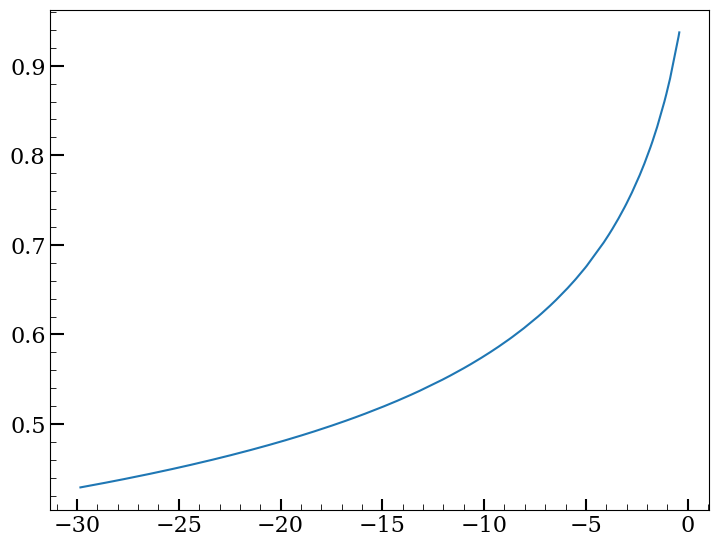

In [2]:
np.random.seed(42)
x_prime_dstrn_train = np.sort(np.random.uniform(-30.0, -0.016, 200))
x_prime_dstrn_test = np.sort(np.random.uniform(-30.0, -0.016, 200))

target_train = special.hyp2f1(1/3, 1, 11/6, x_prime_dstrn_train)
target_test = special.hyp2f1(1/3, 1, 11/6, x_prime_dstrn_test)

plt.plot(x_prime_dstrn_train, target_train)

In [3]:
# Define problem for SR optimization

hypergeom_args = {
    'allowed_symbols': "add,sub,mul,pow,aq,constant,log,variable",
    'epsilon': 1e-5,
    'objectives': ['mae', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*5,
    'n_threads': 12,
}

Problem_hypergeom = Problem("Hypergeometric Function Problem", (x_prime_dstrn_train, target_train), (x_prime_dstrn_test, target_test), hypergeom_args)

In [4]:
Problem_hypergeom.solve()
print(f"number of solutions: {len(Problem_hypergeom.solutions)}")

[0.035866666585206985, 5.0], 194.42, (0.750567018986 + (0.248869270086 * (0.050896644592 * X1))), 0.00
[0.0038137263618409634, 6.0], 199.67, (1.039754390717 + ((-0.133079782128) * log(((-3.285359382629) * X1)))), 0.00
[0.0032267856877297163, 7.0], 206.21, (4.296671867371 + ((-3.247474670410) * (((-4.159729480743) * X1) ^ 0.036383550614))), 0.00
[0.0017328127287328243, 8.0], 205.22, (1.532672524452 + (0.139634206891 * log((0.016438677907 / (sqrt(1 + (1.528526663780 * X1) ^ 2)))))), 0.00
[0.0001503568928455934, 9.0], 206.33, (1.188774585724 + ((-0.543454825878) * log(log((4.214979171753 - (1.774943470955 * X1)))))), 0.00
[0.00014538585674017668, 10.0], 216.84, (12.169546127319 + ((-11.009630203247) * (log((3.995826482773 - (1.747608542442 * X1))) ^ 0.046131167561))), 0.00
[0.00014512613415718079, 12.0], 231.18, (88.651779174805 + ((-11.009776115417) * ((log((3.995826482773 - (1.747608542442 * X1))) ^ 0.046131167561) + 6.946743011475))), 0.00
[9.970038809115067e-05, 14.0], 222.81, (0.8384

<Axes: title={'center': 'Hypergeometric Function Problem: solution 5 Train'}>

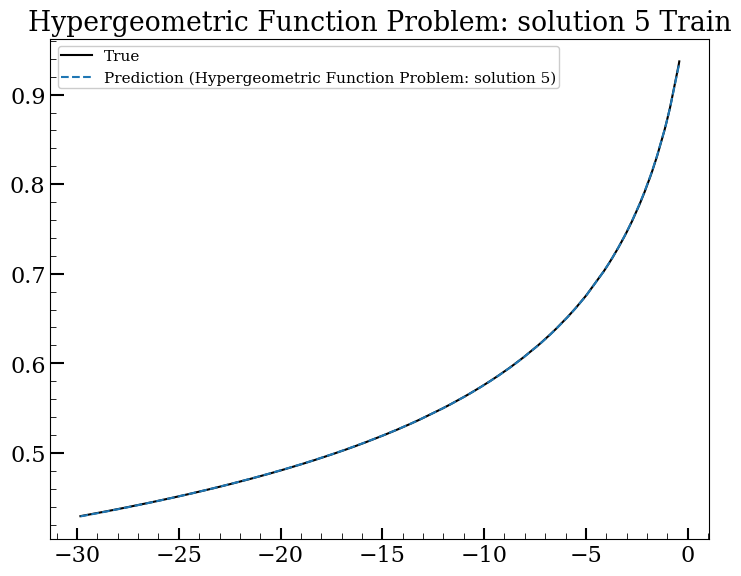

In [26]:
Problem_hypergeom.solutions[5].plot_results()

<Axes: xlabel='$-x$', ylabel='Fractional Error'>

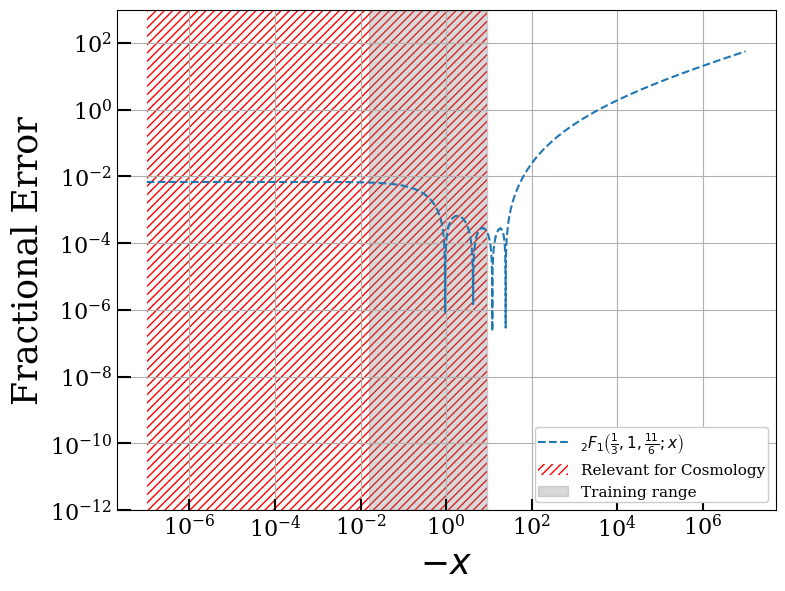

In [27]:
coeff = [1/3, 1, 11/6]  # Coefficients for the hypergeometric function for the growth factor
x_val = -1.0 * np.geomspace(10**(-7),10**7, 10000)
Problem_hypergeom.solutions[5].plot_fractional_error_hypergeom(x_val, coeff)

#plt.savefig("/home/danielct/Pictures/oxford_internship/fractional_error_growth_factor_5min_run_sol_5.pdf", dpi=300, bbox_inches='tight')

<Axes: title={'center': 'Hypergeometric Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

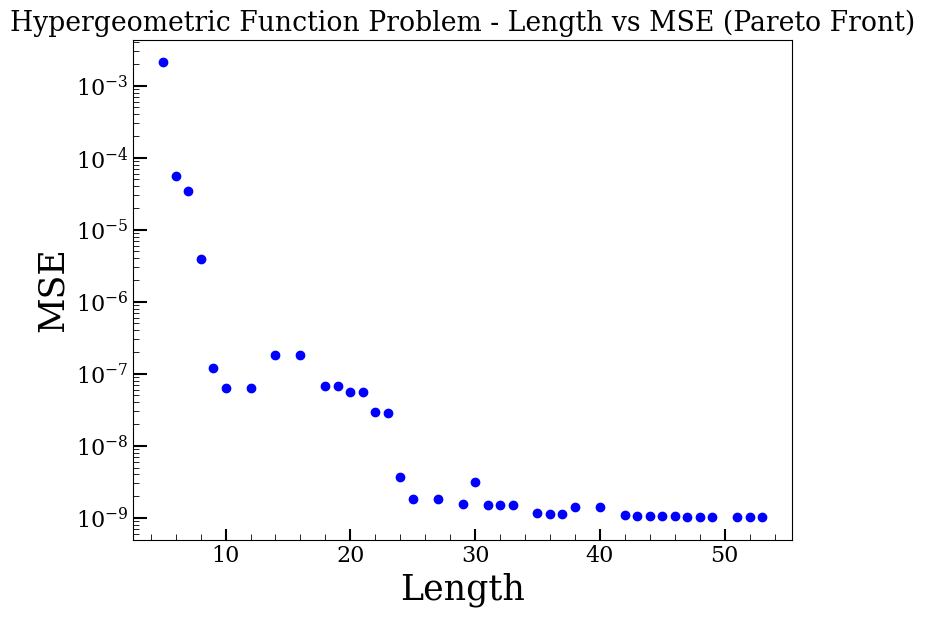

In [28]:
Problem_hypergeom.plot_l_vs_mse()

In [56]:
k=21
Problem_hypergeom.solutions[k].display_expression(), Problem_hypergeom.solutions[k].extract_and_format()

<IPython.core.display.Math object>

(None,
 ('b_{0} - \\frac{b_{1}·\\log{\\left(X_{1}^{2}·b_{2} + 1 \\right)}}{\\sqrt{X_{1}^{2}·b_{3} + 1}} + \\frac{b_{13}}{\\sqrt{X_{1}^{2}·b_{17} + 1}·\\sqrt{\\frac{b_{14}}{b_{15}·\\left(- X_{1}\\right)^{b_{16}} + 1} + 1}} + \\frac{b_{4}}{\\sqrt{X_{1}^{2}·b_{3} + 1}} + \\frac{b_{5}}{\\sqrt{X_{1}^{2}·b_{12} + 1}·\\sqrt{X_{1}^{2}·b_{3} + 1}·\\sqrt{\\frac{b_{6}}{X_{1}^{2}·b_{7} - X_{1}·b_{8}·\\log{\\left(- X_{1} \\right)} + X_{1}·b_{9} - b_{10}·\\log{\\left(- X_{1} \\right)} + b_{11} + \\log{\\left(- X_{1} \\right)}^{2}} + 1}}',
  {'b0': 0.787477076054,
   'b1': 0.061922803521,
   'b2': 3.144695388770434,
   'b3': 2.7724096837180792e-05,
   'b4': 0.11999397600978844,
   'b5': 0.00752678235574412,
   'b6': 2.669047012789953,
   'b7': 6.065359306350049,
   'b8': 4.9255900383,
   'b9': 9.010790436113446,
   'b10': 3.6587659005512347,
   'b11': 4.346641978759122,
   'b12': 0.02345940240285394,
   'b13': 0.05029841856353996,
   'b14': 0.015856570099711108,
   'b15': 1.544658644411841e-10,
   'b

In [59]:
Problem_hypergeom.solutions[0].compute_limits(0).evalf()

0.750567018986000

In [10]:
Problem_hypergeom.export_solutions_to_latex(n=15)

LaTeX file written to latex_files/Hypergeometric_Function_Problemno_solutions_15/solutions.tex


----------- Multidimensional optimisation ----------------

In [11]:
# Latin Hypercube Sampling Example for comoving distance (flat universe, negligible radiation), optimising based w.t.s. to redshift and omega_matter
from scipy.stats import qmc

sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=200)

l_bound = [0, 0.1]
u_bound = [3, 0.5]

sample = qmc.scale(sample, l_bound, u_bound)
sample

array([[2.37026402, 0.45000729],
       [2.77817283, 0.10215011],
       [0.36161918, 0.42391226],
       [1.8661443 , 0.21243856],
       [1.26272448, 0.11246417],
       [2.48735025, 0.31616601],
       [1.97306454, 0.15187612],
       [1.5146137 , 0.16726186],
       [2.05244953, 0.19679426],
       [0.46989952, 0.15242616],
       [0.44955934, 0.10669535],
       [1.44061317, 0.25776013],
       [0.50350001, 0.28448492],
       [0.35449188, 0.38314002],
       [2.0602277 , 0.36652045],
       [0.88427287, 0.40002317],
       [0.60644396, 0.30740235],
       [2.14995996, 0.4748381 ],
       [0.97968658, 0.40721746],
       [1.72315019, 0.32613242],
       [0.55475207, 0.35081348],
       [1.65444925, 0.44206847],
       [2.89140851, 0.30811421],
       [2.16231973, 0.11487259],
       [0.45971801, 0.19837659],
       [0.56411354, 0.27938337],
       [2.07072656, 0.24276597],
       [0.15503149, 0.33880941],
       [1.34874441, 0.4276698 ],
       [1.61414208, 0.46142926],
       [2.

In [12]:
# Generating training data for comoving distance
from scipy.integrate import quad
from typing import Tuple
c = 299792.458  # speed of light in km/s
H0 = 70.0 # Hubble constant in km/s/Mpc

def comoving_distance(params: Tuple[float, float], H0_val: float = H0) -> float:

    z, omega_m = params
    if z < 0 or not (0 < omega_m < 1):
        raise ValueError("Invalid input: z must be >= 0 and 0 < omega_m < 1")

    def inv_E(z_prime):
        return 1.0 / np.sqrt(omega_m * (1 + z_prime)**3 + (1 - omega_m))

    integral, _ = quad(inv_E, 0, z)
    D_C = (c / H0_val) * integral  # in Mpc
    return D_C

comoving_distances = np.array([comoving_distance(sample[i]) for i in range(len(sample))])


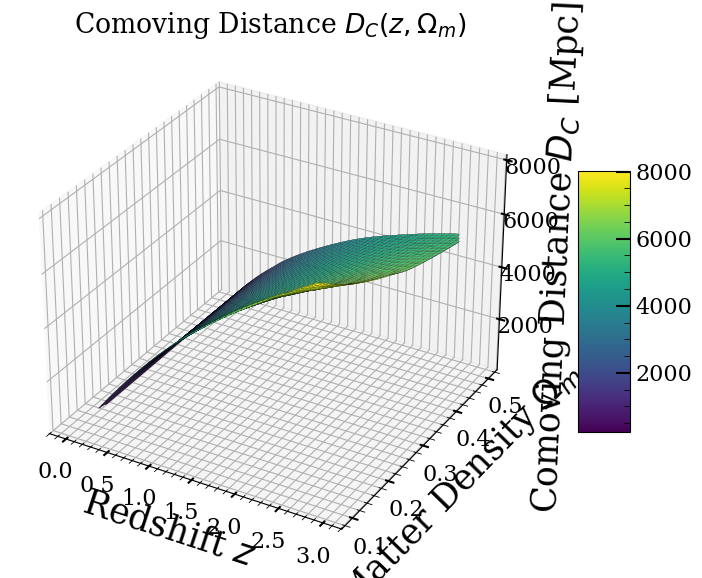

In [13]:
from scipy.interpolate import griddata

# Create grid
z_lin = np.linspace(sample[:, 0].min(), sample[:, 0].max(), 100)
omega_m_lin = np.linspace(sample[:, 1].min(), sample[:, 1].max(), 100)
Z_grid, OmegaM_grid = np.meshgrid(z_lin, omega_m_lin)

# Interpolate the scattered data onto the grid
D_C_grid = griddata(sample, comoving_distances, (Z_grid, OmegaM_grid), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(Z_grid, OmegaM_grid, D_C_grid,
                       cmap='viridis', edgecolor='k', linewidth=0.1)

ax.set_xlabel('Redshift $z$')
ax.set_ylabel('Matter Density $\\Omega_m$')
ax.set_zlabel('Comoving Distance $D_C$ [Mpc]')
ax.set_title('Comoving Distance $D_C(z, \\Omega_m)$')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


In [14]:
name = "comoving distance 2d problem"

d2_args = {
    'allowed_symbols': "add,sub,mul,pow,aq,constant,log,exp,variable",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'],
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*10,
    'n_threads': 12,
}

Problem_comoving_distance = Problem(name, (sample, comoving_distances), (sample, comoving_distances), d2_args)

In [15]:
Problem_comoving_distance.solve()

[593.4397583007812, 5.0], 35217296.00, (938.223937988281 + ((-8138.965820312500) * ((-0.255567997694) * X1))), 352170.73
[477.00238037109375, 6.0], 22753354.00, (8280.273437500000 + ((-8260.071289062500) * exp(((-0.511553406715) * X1)))), 227531.25
[170.52056884765625, 7.0], 2907972.00, (9581.485351562500 + ((-9362.206054687500) * ((0.262640416622 * X2) ^ (0.149326339364 * X1)))), 29077.28
[164.63323974609375, 8.0], 2710660.75, (16655.369140625000 + ((-6061.631347656250) * exp(((0.263998538256 * X2) ^ (0.088902346790 * X1))))), 27104.11
[122.6188735961914, 9.0], 1503800.50, (136.135116577148 + (5662.829589843750 * ((0.787351310253 * X1) / (sqrt(1 + (((-0.415026634932) * X1) - (1.996373534203 * X2)) ^ 2))))), 15035.41
[43.602760314941406, 10.0], 190385.00, (4126.752929687500 + ((-4183.455078125000) * (exp(((-0.901679873466) * X1)) - ((0.420915871859 * X1) / (sqrt(1 + (6.032423496246 * X2) ^ 2)))))), 1901.20
[35.96379470825195, 12.0], 129619.24, (4152.689453125000 + ((-4310.521484375000)

In [16]:
Problem_comoving_distance.solutions[4].display_expression()

<IPython.core.display.Math object>

In [17]:
Problem_comoving_distance.export_solutions_to_latex(n=14)

LaTeX file written to latex_files/comoving_distance_2d_problemno_solutions_14/solutions.tex


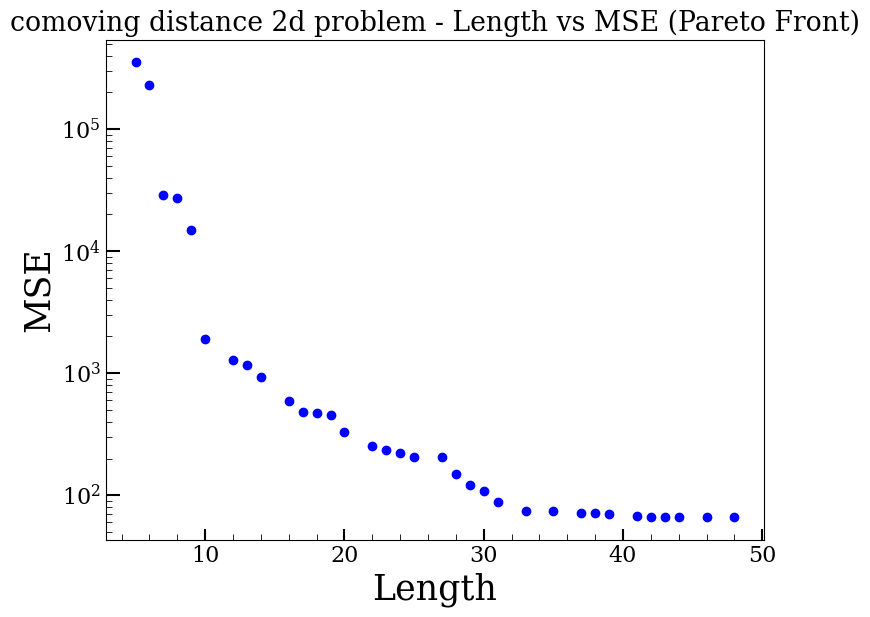

In [18]:
Problem_comoving_distance.plot_l_vs_mse()


plt.savefig("/home/danielct/Pictures/oxford_internship/comoving_distance_2d_problem.pdf", dpi=300, bbox_inches='tight')